In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torchvision.models import resnet18, ResNet18_Weights

from torchinfo import summary

from torchmetrics.functional.classification import multiclass_accuracy

c:\Users\mathn\.conda\envs\Torch_PY38\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 지정된 프로시저를 찾을 수 없습니다'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
img_dir="./add_data"
img_test_dir="./data_test"

preprocessing = transforms.Compose(transforms=[
    transforms.Resize(size=100, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.CenterCrop(size=50),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

imgDS = ImageFolder(root=img_dir, transform=preprocessing)
imgTS = ImageFolder(root=img_test_dir, transform=preprocessing)
print(imgDS.classes, imgDS.targets, imgDS.imgs, end="\n")

['mop', 'mop_dog'] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [4]:
imgDL=DataLoader(imgDS, batch_size=10, shuffle=True, drop_last=False)
imtTDL=DataLoader(imgTS, batch_size=10, shuffle=True, drop_last=False)
for (img, label) in imgDL:
    print(img.shape, label)

torch.Size([10, 3, 50, 50]) tensor([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])
torch.Size([10, 3, 50, 50]) tensor([1, 1, 1, 0, 0, 1, 0, 0, 1, 1])
torch.Size([10, 3, 50, 50]) tensor([0, 1, 0, 0, 0, 0, 0, 1, 1, 1])
torch.Size([10, 3, 50, 50]) tensor([0, 0, 0, 0, 1, 1, 1, 1, 0, 0])
torch.Size([10, 3, 50, 50]) tensor([0, 1, 1, 1, 1, 1, 1, 1, 0, 1])
torch.Size([10, 3, 50, 50]) tensor([1, 0, 0, 1, 1, 0, 0, 1, 1, 1])
torch.Size([10, 3, 50, 50]) tensor([0, 0, 0, 0, 1, 0, 0, 1, 1, 1])
torch.Size([10, 3, 50, 50]) tensor([1, 1, 0, 0, 1, 1, 0, 0, 0, 0])
torch.Size([10, 3, 50, 50]) tensor([1, 0, 0, 0, 0, 1, 1, 1, 1, 1])
torch.Size([10, 3, 50, 50]) tensor([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])
torch.Size([10, 3, 50, 50]) tensor([1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
torch.Size([10, 3, 50, 50]) tensor([0, 0, 0, 1, 0, 0, 1, 1, 1, 0])
torch.Size([10, 3, 50, 50]) tensor([1, 1, 1, 0, 0, 1, 1, 1, 0, 0])
torch.Size([10, 3, 50, 50]) tensor([1, 0, 0, 0, 0, 0, 0, 0, 1, 0])
torch.Size([10, 3, 50, 50]) tensor([1, 0, 1, 0, 1, 1, 1, 0, 1,

In [5]:
res_model = resnet18(weights=ResNet18_Weights.DEFAULT)
res_model.fc = nn.Linear(in_features=512, out_features=3)

In [6]:
summary(model=res_model, input_size=(3,3,24,24))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [3, 3]                    --
├─Conv2d: 1-1                            [3, 64, 12, 12]           9,408
├─BatchNorm2d: 1-2                       [3, 64, 12, 12]           128
├─ReLU: 1-3                              [3, 64, 12, 12]           --
├─MaxPool2d: 1-4                         [3, 64, 6, 6]             --
├─Sequential: 1-5                        [3, 64, 6, 6]             --
│    └─BasicBlock: 2-1                   [3, 64, 6, 6]             --
│    │    └─Conv2d: 3-1                  [3, 64, 6, 6]             36,864
│    │    └─BatchNorm2d: 3-2             [3, 64, 6, 6]             128
│    │    └─ReLU: 3-3                    [3, 64, 6, 6]             --
│    │    └─Conv2d: 3-4                  [3, 64, 6, 6]             36,864
│    │    └─BatchNorm2d: 3-5             [3, 64, 6, 6]             128
│    │    └─ReLU: 3-6                    [3, 64, 6, 6]             --
│

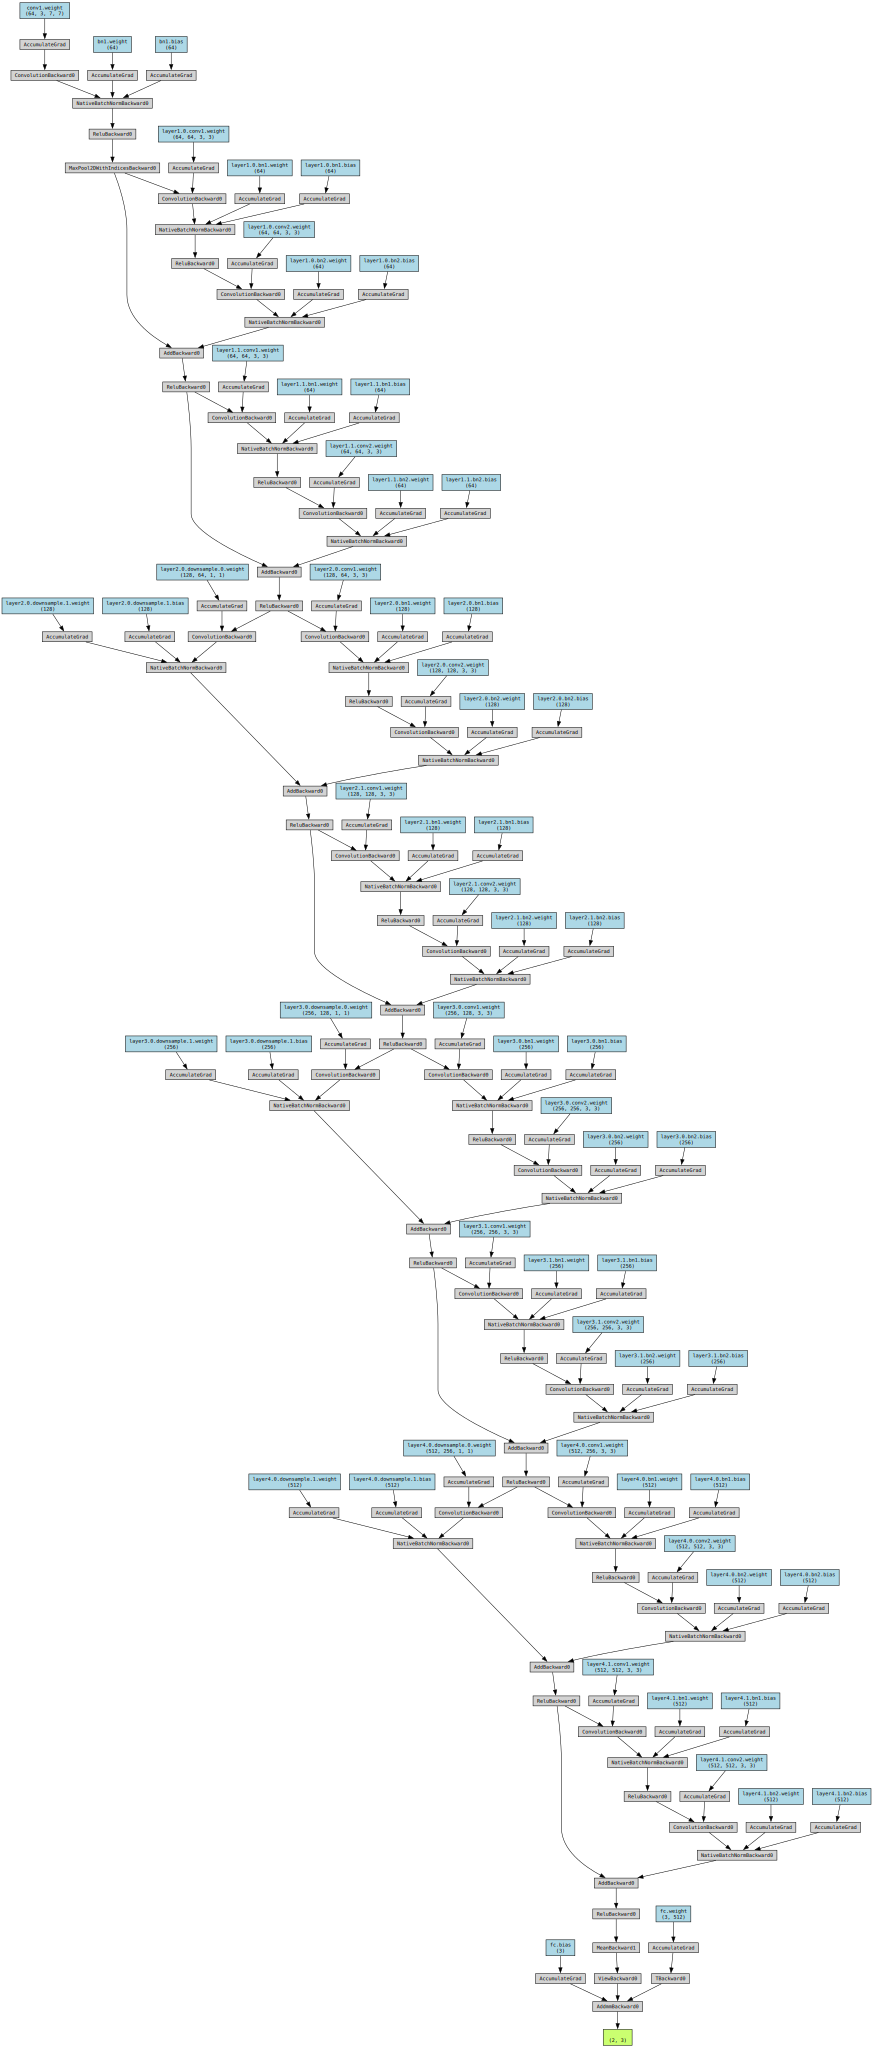

In [7]:
from torchviz import make_dot

#x=torch.randn(1,3,32,32).to(DEVICE)
#y=model(x)

make_dot(res_model(img),params=dict(res_model.named_parameters()))

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(res_model.parameters(), lr=0.001)

In [9]:
def get_accuracy(loader, model):
    total=0
    correct=0
    for data in loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1) # dim=1을 주어 최종 값 계산
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return correct / total

In [10]:
from tqdm import tqdm # 프로그레스 바 생성
from torch.optim.lr_scheduler import ReduceLROnPlateau # 스케줄러 생성 
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=15, verbose=True)

loss_list=[]
tas_list=[]
tes_list=[]
max=0
for epoch in range(100): # 10회 반복 
    running_loss = 0.0 # 1 epoch당 누적 로스값 
    #==================================================================================
    pbar = tqdm(enumerate(imgDL), total=len(imgDL)) 
    for i, data in pbar: # pbar가 데이터 로더 역할 수행
        inputs, labels = data
        outputs = res_model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() # 로스 누적 
        if i % 10 == 9:
            pbar.set_description(f'Epoch [{epoch + 1}/{100}], 횟수 [{i + 1}/{len(imgDL)}], Loss: {running_loss / 10:.4f}')
            loss_list.append(running_loss)
            running_loss = 0.0
    #==================================================================================   
    # 모델 평가

    with torch.no_grad():
        train_accuracy = get_accuracy(imgDL, res_model)
        test_accuracy = get_accuracy(imtTDL, res_model)
    print(f'{epoch} Epoch 종료 후 train_score : {(100 * train_accuracy)}')
    print(f'{epoch} Epoch 종료 후 test_score : {(100 * test_accuracy)}')
    tas_list.append(train_accuracy)
    tes_list.append(test_accuracy)
    if max < test_accuracy:
        max = test_accuracy
        torch.save(res_model.state_dict(), 'first_model.pth')
    
    scheduler.step(loss)
    if scheduler.num_bad_epochs >= scheduler.patience:
        print(f"Early Stopping at : {epoch} Epoch")
        break

c:\Users\mathn\.conda\envs\Torch_PY38\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1/100], 횟수 [40/43], Loss: 0.5264: 100%|██████████| 43/43 [00:08<00:00,  4.84it/s]


0 Epoch 종료 후 train_score : 86.25592417061611
0 Epoch 종료 후 test_score : 80.43478260869566


Epoch [2/100], 횟수 [40/43], Loss: 0.3673: 100%|██████████| 43/43 [00:08<00:00,  4.94it/s]


1 Epoch 종료 후 train_score : 78.43601895734598
1 Epoch 종료 후 test_score : 75.0


Epoch [3/100], 횟수 [40/43], Loss: 0.3354: 100%|██████████| 43/43 [00:08<00:00,  4.98it/s]


2 Epoch 종료 후 train_score : 84.12322274881517
2 Epoch 종료 후 test_score : 81.52173913043478


Epoch [4/100], 횟수 [40/43], Loss: 0.4604: 100%|██████████| 43/43 [00:08<00:00,  5.25it/s]


3 Epoch 종료 후 train_score : 86.96682464454977
3 Epoch 종료 후 test_score : 78.26086956521739


Epoch [5/100], 횟수 [40/43], Loss: 0.4222: 100%|██████████| 43/43 [00:08<00:00,  5.22it/s]


4 Epoch 종료 후 train_score : 92.18009478672985
4 Epoch 종료 후 test_score : 83.69565217391305


Epoch [6/100], 횟수 [40/43], Loss: 0.3803: 100%|██████████| 43/43 [00:08<00:00,  5.32it/s]


5 Epoch 종료 후 train_score : 85.54502369668246
5 Epoch 종료 후 test_score : 86.95652173913044


Epoch [7/100], 횟수 [40/43], Loss: 0.2579: 100%|██████████| 43/43 [00:08<00:00,  5.20it/s]


6 Epoch 종료 후 train_score : 93.60189573459715
6 Epoch 종료 후 test_score : 84.78260869565217


Epoch [8/100], 횟수 [40/43], Loss: 0.2496: 100%|██████████| 43/43 [00:08<00:00,  5.00it/s]


7 Epoch 종료 후 train_score : 93.8388625592417
7 Epoch 종료 후 test_score : 85.86956521739131


Epoch [9/100], 횟수 [40/43], Loss: 0.1565: 100%|██████████| 43/43 [00:08<00:00,  5.21it/s]


8 Epoch 종료 후 train_score : 83.41232227488152
8 Epoch 종료 후 test_score : 76.08695652173914


Epoch [10/100], 횟수 [40/43], Loss: 0.2635: 100%|██████████| 43/43 [00:08<00:00,  4.96it/s]


9 Epoch 종료 후 train_score : 88.38862559241706
9 Epoch 종료 후 test_score : 82.6086956521739


Epoch [11/100], 횟수 [40/43], Loss: 0.3496: 100%|██████████| 43/43 [00:08<00:00,  4.91it/s]


10 Epoch 종료 후 train_score : 96.44549763033176
10 Epoch 종료 후 test_score : 77.17391304347827


Epoch [12/100], 횟수 [40/43], Loss: 0.4057: 100%|██████████| 43/43 [00:08<00:00,  4.84it/s]


11 Epoch 종료 후 train_score : 93.60189573459715
11 Epoch 종료 후 test_score : 89.13043478260869


Epoch [13/100], 횟수 [40/43], Loss: 0.1116: 100%|██████████| 43/43 [00:08<00:00,  5.02it/s]


12 Epoch 종료 후 train_score : 98.34123222748815
12 Epoch 종료 후 test_score : 89.13043478260869


Epoch [14/100], 횟수 [40/43], Loss: 0.0808: 100%|██████████| 43/43 [00:08<00:00,  4.97it/s]


13 Epoch 종료 후 train_score : 98.10426540284361
13 Epoch 종료 후 test_score : 86.95652173913044


Epoch [15/100], 횟수 [40/43], Loss: 0.1553: 100%|██████████| 43/43 [00:08<00:00,  5.19it/s]


14 Epoch 종료 후 train_score : 97.86729857819904
14 Epoch 종료 후 test_score : 80.43478260869566


Epoch [16/100], 횟수 [40/43], Loss: 0.2958: 100%|██████████| 43/43 [00:07<00:00,  5.45it/s]


15 Epoch 종료 후 train_score : 93.12796208530806
15 Epoch 종료 후 test_score : 77.17391304347827


Epoch [17/100], 횟수 [40/43], Loss: 0.0830: 100%|██████████| 43/43 [00:07<00:00,  5.48it/s]


16 Epoch 종료 후 train_score : 95.97156398104265
16 Epoch 종료 후 test_score : 86.95652173913044


Epoch [18/100], 횟수 [40/43], Loss: 0.1103: 100%|██████████| 43/43 [00:07<00:00,  5.46it/s]


17 Epoch 종료 후 train_score : 98.5781990521327
17 Epoch 종료 후 test_score : 86.95652173913044


Epoch [19/100], 횟수 [40/43], Loss: 0.1982: 100%|██████████| 43/43 [00:08<00:00,  5.24it/s]


18 Epoch 종료 후 train_score : 92.89099526066352
18 Epoch 종료 후 test_score : 82.6086956521739


Epoch [20/100], 횟수 [40/43], Loss: 0.2169: 100%|██████████| 43/43 [00:08<00:00,  4.88it/s]


19 Epoch 종료 후 train_score : 94.07582938388626
19 Epoch 종료 후 test_score : 82.6086956521739


Epoch [21/100], 횟수 [40/43], Loss: 0.0864: 100%|██████████| 43/43 [00:08<00:00,  4.95it/s]


20 Epoch 종료 후 train_score : 96.44549763033176
20 Epoch 종료 후 test_score : 85.86956521739131


Epoch [22/100], 횟수 [40/43], Loss: 0.0943: 100%|██████████| 43/43 [00:08<00:00,  4.89it/s]


21 Epoch 종료 후 train_score : 98.10426540284361
21 Epoch 종료 후 test_score : 83.69565217391305


Epoch [23/100], 횟수 [40/43], Loss: 0.0529: 100%|██████████| 43/43 [00:08<00:00,  4.84it/s]


22 Epoch 종료 후 train_score : 96.44549763033176
22 Epoch 종료 후 test_score : 83.69565217391305


Epoch [24/100], 횟수 [40/43], Loss: 0.1934: 100%|██████████| 43/43 [00:09<00:00,  4.60it/s]


23 Epoch 종료 후 train_score : 91.9431279620853
23 Epoch 종료 후 test_score : 80.43478260869566


Epoch [25/100], 횟수 [40/43], Loss: 0.3185: 100%|██████████| 43/43 [00:09<00:00,  4.38it/s]


24 Epoch 종료 후 train_score : 80.56872037914692
24 Epoch 종료 후 test_score : 70.65217391304348


Epoch [26/100], 횟수 [40/43], Loss: 0.2932: 100%|██████████| 43/43 [00:09<00:00,  4.56it/s]


25 Epoch 종료 후 train_score : 90.28436018957346
25 Epoch 종료 후 test_score : 75.0


Epoch [27/100], 횟수 [40/43], Loss: 0.0568: 100%|██████████| 43/43 [00:08<00:00,  4.87it/s]


26 Epoch 종료 후 train_score : 99.28909952606635
26 Epoch 종료 후 test_score : 80.43478260869566


Epoch [28/100], 횟수 [40/43], Loss: 0.1153: 100%|██████████| 43/43 [00:08<00:00,  4.82it/s]


27 Epoch 종료 후 train_score : 98.81516587677726
27 Epoch 종료 후 test_score : 79.34782608695652


Epoch [29/100], 횟수 [40/43], Loss: 0.0255: 100%|██████████| 43/43 [00:09<00:00,  4.41it/s]


28 Epoch 종료 후 train_score : 97.39336492890996
28 Epoch 종료 후 test_score : 80.43478260869566
Early Stopping at : 28 Epoch


In [ ]:
from tqdm import tqdm # 프로그레스 바 생성

for epoch in range(100): # 10회 반복 

    pbar = tqdm(enumerate(imgDL), total=len(imgDL)) 
    for i, data in pbar: # pbar가 데이터 로더 역할 수행
        inputs, labels = data
        outputs = res_model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() # 로스 누적 
        if i % 10 == 9:
            pbar.set_description(f'Epoch [{epoch + 1}/{100}], 횟수 [{i + 1}/{len(imgDL)}], Loss: {running_loss / 10:.4f}')
            loss_list.append(running_loss)
            running_loss = 0.0


NameError: name 'np' is not defined

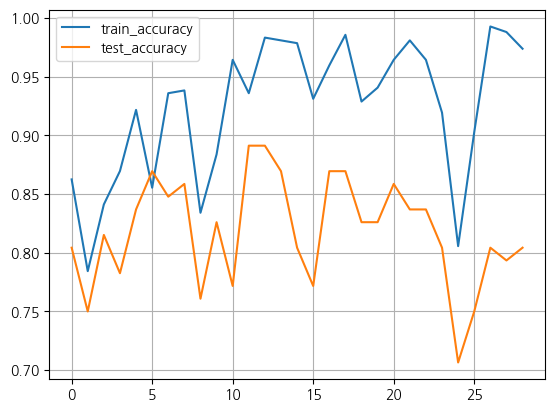

In [11]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 그래프 그리기
plt.plot(tas_list, label="train_accuracy")
plt.plot(tes_list, label="test_accuracy")
plt.grid(True)
plt.legend()

max_value = (np.max(tas_list), np.max(tes_list))
print(max_value)
max_index = tas_list.index(max_value[1]) if max_value[1] in tas_list else tes_list.index(max_value[1])
max_x = max_index
max_y = max_value[1]
plt.text(max_x, max_y, f'Max: {max_y:.2f}', ha='right')
plt.title("RES18 결과")
plt.show()

In [ ]:
# 학습된 모델 불러오기
res_model.load_state_dict(torch.load("./resnet18.pth"))

# 학습된 모델 평가
res_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in imtTDL:
        images, labels = data
        outputs = res_model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test 정확도 : {100*correct/total}%")

# 학습된 모델 사용하기
import matplotlib.pyplot as plt
import numpy as np

# 테스트 이미지 불러오기
test_img = ImageFolder(root=img_dir, transform=preprocessing)
test_loader = DataLoader(test_img, batch_size=4, shuffle=True)


Test 정확도 : 75.0%
